In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
#pd.set_option('max_column')

In [7]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [8]:
df.shape

(940, 15)

In [9]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [10]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [11]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [18]:
#clean the data
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='mixed')
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [19]:
df['distance_diff'] = df['TrackerDistance']

In [20]:
df['distance_diff'].value_counts()

distance_diff
0.000000     78
2.600000      5
0.010000      5
3.910000      4
2.680000      4
             ..
2.460000      1
5.330000      1
5.820000      1
9.490000      1
19.559999     1
Name: count, Length: 613, dtype: int64

In [25]:
df.query('distance_diff>0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,8.500000
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,6.970000
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,6.740000
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,6.280000
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,8.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,8.110000
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,18.250000
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,8.150000
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,19.559999


In [26]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [32]:
df.rename(columns ={'activitydate':'activity_date', 'totalsteps':'total_steps', 'totaldistance':'total_distance', 'trackerdistance':'tracker_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes', 'fairlyactiveminutes':'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes':'sedentary_minutes'},inplace=True)

In [33]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [64]:
#create columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] =day_of_week

df['n_day_of_week']= df['activity_date'].dt.weekday #0monday 6 sunday
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_level', 'day_of_week', 'n_day_of_week'],
      dtype='object')

In [37]:
df.head(4)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,8.50,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,6.97,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,6.74,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,6.28,Friday,4


In [39]:
#checking null values

df.isna().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [40]:
df.isnull().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [41]:
#checking duplicates
df.duplicated().sum()

0

In [65]:
#subset the data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'activity_level', 'day_of_week', 'n_day_of_week']]

In [43]:
df.head(3)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776


In [53]:
#analysis 
#categories
#sedentary:6000 on avg 
#active: between 6000 and 12000 on avg
#very active :more than 12000 on avg

id_grp = df.groupby(['id'])
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)
id_avg_step = id_avg_step.to_frame()

conditions =[
(id_avg_step <=6000),
    (id_avg_step >6000) & (id_avg_step <12000),
    (id_avg_step >=12000)
    
]
values =['sedentary','active','very_active']
id_avg_step['activity_level'] =np.select(conditions,values)
id_activity_level=id_avg_step['activity_level']


df['activity_level'] = [id_activity_level[c] for c in df['id']]


In [54]:
#2nd category
#low use :less than 8 hpurs per day
#normal use:between 8 and 16 hours per day
#high use : more than 16 hours and up to 24 hours

df.head()

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,very_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,very_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,very_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,very_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,very_active


In [67]:


df['activity_date'].value_counts()

activity_date
2016-04-12    33
2016-04-14    33
2016-04-15    33
2016-04-13    33
2016-04-23    32
2016-04-29    32
2016-04-28    32
2016-04-26    32
2016-04-25    32
2016-04-24    32
2016-04-27    32
2016-04-22    32
2016-04-20    32
2016-04-19    32
2016-04-18    32
2016-04-17    32
2016-04-16    32
2016-04-21    32
2016-04-30    31
2016-05-01    30
2016-05-05    29
2016-05-07    29
2016-05-06    29
2016-05-03    29
2016-05-04    29
2016-05-02    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: count, dtype: int64

In [59]:
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862


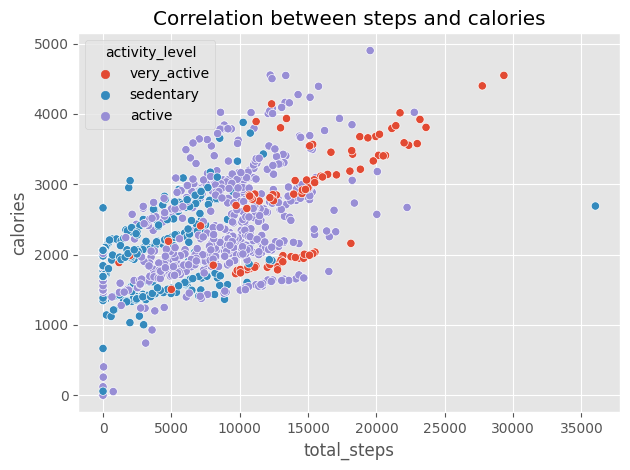

In [61]:
#share correlation between steps and calories burned

ax=sns.scatterplot(x='total_steps',y='calories',data=df, hue=df['activity_level'])
plt.title('Correlation between steps and calories')
plt.tight_layout()
plt.show()

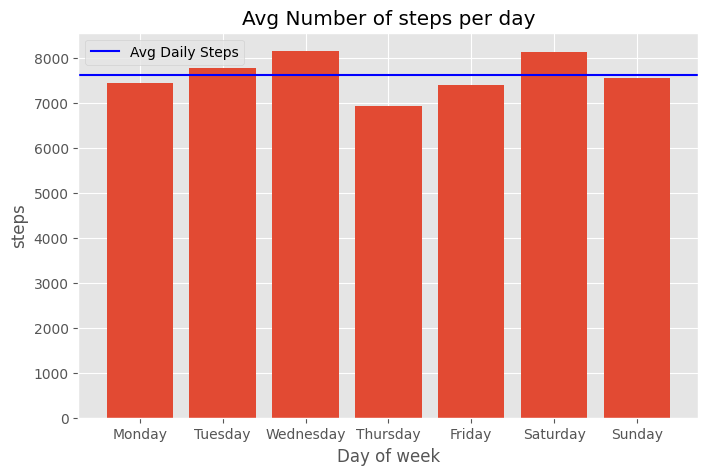

In [73]:
#average steps per day
day_of_week =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax =plt.subplots(1,1,figsize=(8,5))
day_grp =df.groupby(['day_of_week'])
avg_daily_steps = day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)


ax.axhline(y=avg_daily_steps.mean(),color='blue', label='Avg Daily Steps')

ax.set_ylabel('steps')
ax.set_xlabel('Day of week')
ax.set_title('Avg Number of steps per day')
plt.legend()
plt.show()


Text(0.5, 1.0, '%of activity level in minutes')

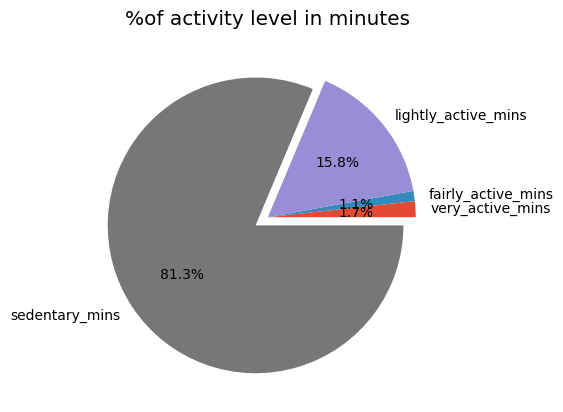

In [83]:
#percentage of activity in minutes
df.columns
very_active_mins =df['very_active_minutes'].sum()
fairly_active_mins=df['fairly_active_minutes'].sum()
lightly_active_mins= df['lightly_active_minutes'].sum()
sedentary_mins =df['sedentary_minutes'].sum()

slices =[very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]

labels =['very_active_mins','fairly_active_mins','lightly_active_mins','sedentary_mins']

explode =[0,0,0,0.1]

plt.pie(slices, labels=labels, explode= explode, autopct ='%1.1f%%')
plt.title('% of activity level in minutes')



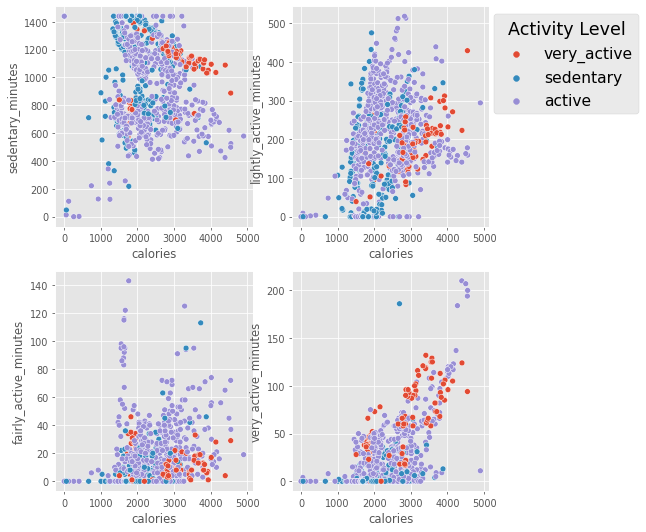

In [92]:
#correlation between activity level in minutes and calories

n_day_of_week =[0,1,2,3,4,5,6]
fig,axes =plt.subplots(nrows=2,ncols=2,figsize=(8,9),dpi=70)

sns.scatterplot(data=df, x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)
sns.scatterplot(data=df, x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)
sns.scatterplot(data=df, x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)
sns.scatterplot(data=df, x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1],legend=True)

plt.legend(title='Activity Level',fontsize=16,title_fontsize=18,bbox_to_anchor=(1.8,2.2))